# Statistics for AI and Data Science - Coursework 1

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
exits = pd.read_csv('hourlyExits.csv', index_col = 'Station')

## Part 1: Calculating Morning and Evening Peak Proportions

In [13]:
peak_counts = pd.DataFrame().assign(AMPeakCount = exits.H07 + exits.H08 + exits.H09, PMPeakCount = exits.H16 + exits.H17 + exits.H18)
peak_counts

,AMPeakCount,PMPeakCount
Station,,
Acton Town,1970,2628
Aldgate,7408,2992
Aldgate East,7618,3803
Alperton,856,1847
Amersham,424,1465
...,...,...
Wimbledon Park,497,1114
Wood Green,2165,6494
Wood Lane,1798,1766


In [19]:
Total = exits.apply(sum, axis=1)

peak_counts = pd.DataFrame().assign(AMProportion = AMPeakCount / Total, PMProportion = PMPeakCount / Total)
peak_counts

,AMProportion,PMProportion
Station,,
Acton Town,0.210425,0.280709
Aldgate,0.459098,0.185424
Aldgate East,0.359238,0.179336
Alperton,0.167253,0.360883
Amersham,0.108579,0.375160
...,...,...
Wimbledon Park,0.150789,0.337985
Wood Green,0.114013,0.341987
Wood Lane,0.272012,0.267171


* The code above calculates the morning and evening peak counts by adding the three columns within each period.
<br>
* The proportion of exits that occur within the morning peak is calculated by dividing AMPeakCount by Total, likewise with the evening peak.

## Part 2: Plotting and Analysing Distributions

In [20]:
peak_counts.describe()

,AMProportion,PMProportion
count,268.000000,268.000000
mean,0.207132,0.298750
std,0.122161,0.087724
min,0.045302,0.084630
25%,0.116120,0.240947
50%,0.169378,0.307397
75%,0.266443,0.361596
max,0.630427,0.496079


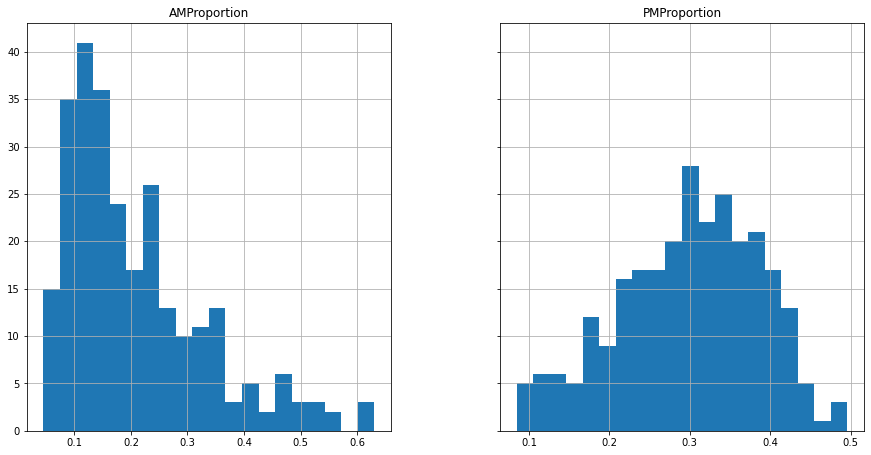

In [21]:
Proportions = peak_counts.hist(bins = 20, figsize = (15, 7.5), sharey = True)

**Mean**
* The mean proportion for a station's exits during the AMPeak period is 20.7%, while for the PMPeak period it is 29.9%
* This shows that, on average, the evening peak period accounts for a greater proportion of a station’s daily traffic.

**Standard deviation**

* The STD for the morning peak is 0.122, while for the evening peak it is 0.088
* This shows that the morning peak has a greater deviation from the mean than the evening peak period.
* In other words, there is a greater concentration of people exiting a station during the PMPeak period.

**Minimum and maximum**

* The lowest and highest proportions for a station’s exits during the morning peak are 4.5% and 63%, respectively. While for the afternoon and evening peak the lowest and highest proportions are 8.5% and 49.6%, respectively.
* Thus the range for AMProportion is 58.5%, and for PMProportion it is 41.1%
* This data supports that of the STD in showing that there is a greater concentration of people exiting a station during the PMPeak period.

**Quartiles**

* The AMProportion quartiles represent a greater spread of exits, while the PMProportion quartiles represent a greater concentration around the mean.
* This can be highlighted by the fact that the median proportion of exits from a station during the morning peak is 16.9%, while for the afternoon and evening peak it is 30.7%

**Histograms**

* The AMProportion histogram is positively skewed, while the PMProportion histogram is negatively skewed. 
* The AMProportion histogram shows a greater spread of data than that of PMProportion.
* Again this supports the point that there is a greater concentration of people exiting a station during the PMPeak period than during the AMPeak period.

## Part 3: A Simple Classification of Stations 

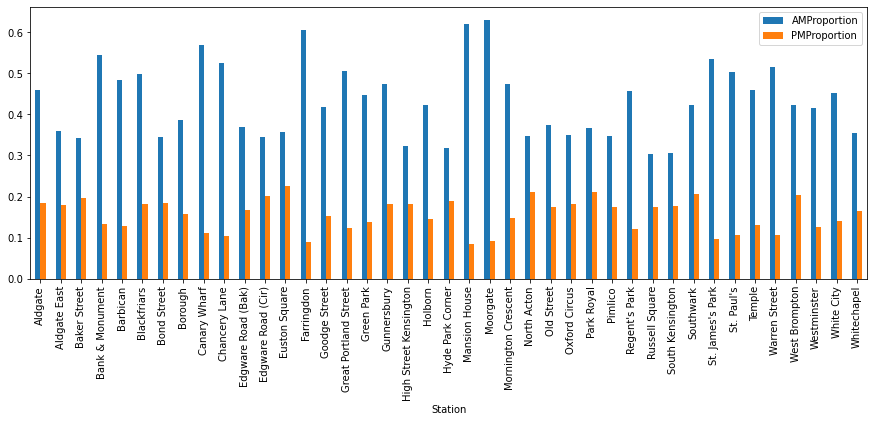

In [22]:
AM = peak_counts.loc[peak_counts.AMProportion - peak_counts.PMProportion > 0.125]
Work = AM.plot(kind = 'bar', figsize = (15, 5))

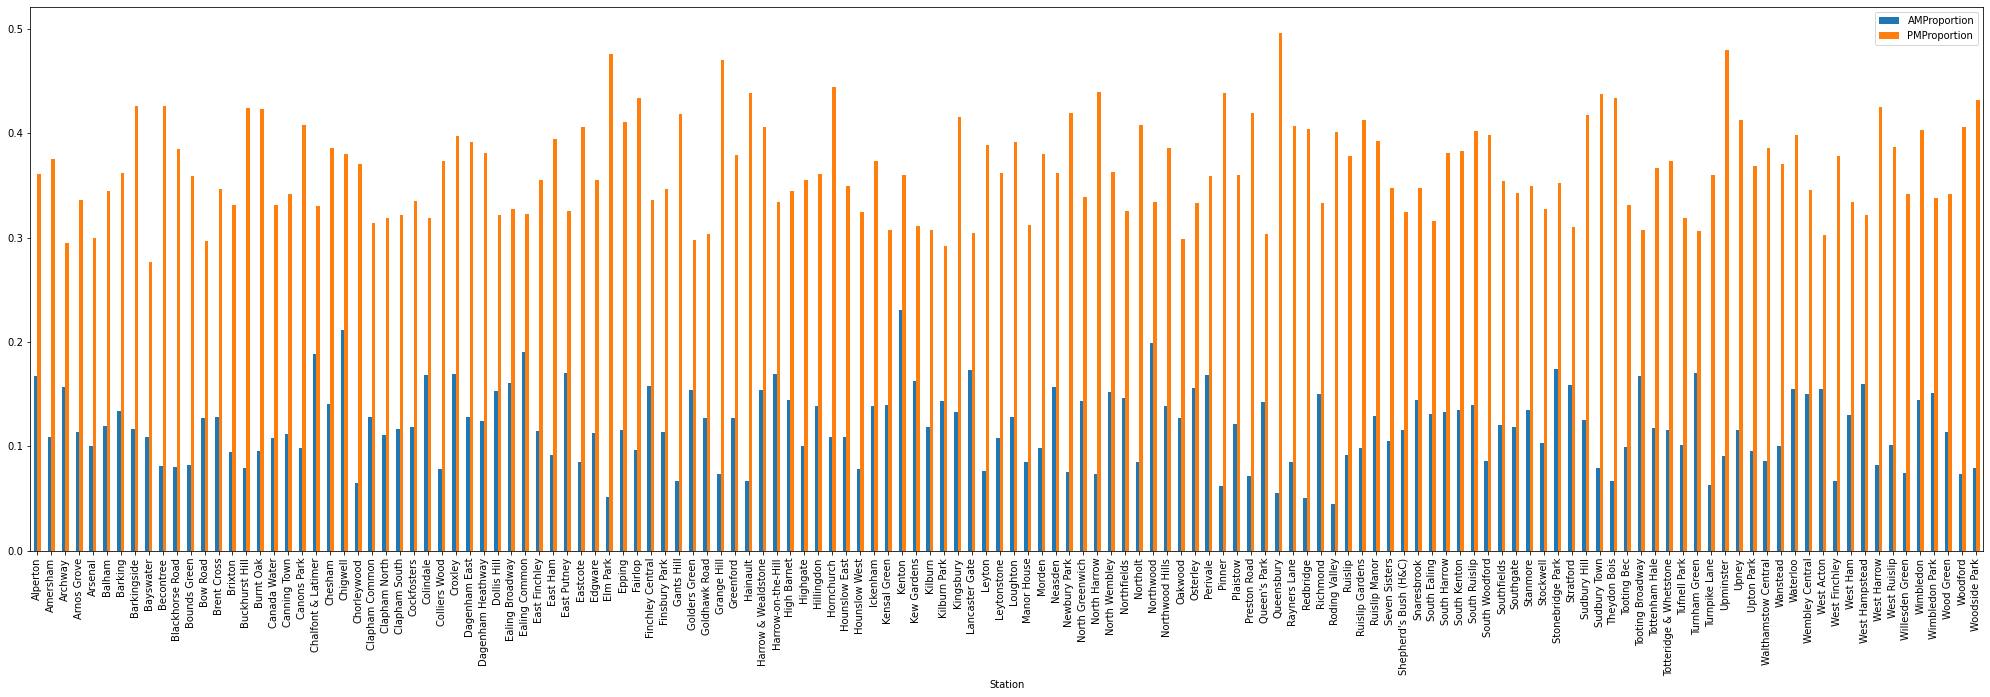

In [23]:
PM = peak_counts.loc[peak_counts.PMProportion - peak_counts.AMProportion > 0.125]
Residential = PM.plot(kind = 'bar', figsize = (35, 10))

**Work:** Goodge Street, Warren Street
<br>
**Residential:** Archway, Balham, Highgate, High Barnet
<br>
**Other:** Embankment, Leicester Square, South Wimbledon, Tottenham Court Road
<br>
* If the proportion of a station's AMPeak exits is 12.5% greater than its PMPeak exits then it can be concluded that those exiting the station are doing so mainly for work purposes.
* If the proportion of a station's PMPeak exits is 12.5% greater than its AMPeak exits then it can be concluded that those exiting the station are doing so mainly for residential purposes.
* All other stations have a more equal mix of people exiting the station for work, residential and other purposes.